# Análise e Limpeza de Dados

## Objetivo

Utilizar o dataset de de edições anteriores de Olimpíadas para encontrar possíveis padrões entre os ganahadores de medalhas.

In [691]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [692]:
jogos = pd.read_csv("df_athlete_events.csv") 
jogos.set_index("Athlete_ID", inplace=True)

In [693]:
jogos.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [694]:
jogos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


In [695]:
duplicates = jogos.duplicated()
print(f"Número de duplicatas: {duplicates.sum()}")

Número de duplicatas: 13


- Dados faltantes
- Dados categóricos -> verificar formato
- Há linhas duplicadas

## Limpeza dos dados

In [696]:
jogos = jogos[~jogos.index.duplicated(keep='first')]


### Dados Categóricos

In [697]:
jogos.describe(include=["object"])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,32967,32967,24593,32967,32967,32967,32967,32967,32967,32967,27867
unique,32905,6,188,585,201,51,5,43,66,730,4
top,Balbir Singh,M,70.0,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Bronze
freq,3,23422,1039,3712,4069,1607,28289,3074,3560,1317,9951


- Weight deveria ser um float
- As colunas Sex e Season apresentam um número de categorias inesperadamente alto
- Verificar categorias dos demais dados

### Coluna "Sex":

In [698]:
print(jogos["Sex"].unique())

['M' 'FEMALE' 'F' 'Vic vai te dar um socao' 'MALE' 'P&D >> Comunidade']


Substituindo "Male" e "Female" por "M" e "F":

In [699]:
jogos["Sex"] = jogos["Sex"].replace("MALE", "M")
jogos["Sex"] = jogos["Sex"].replace("FEMALE", "F")

Verificando número de dados com categorias não previstas para avaliar o impacto de sua exclusão do dataset:

In [700]:
print("Número de 'Vic vai te dar um socao': ", len(jogos[jogos['Sex'] == 'Vic vai te dar um socao']))
print("Número de 'P&D >> Comunidade': ", len(jogos[jogos['Sex'] == 'P&D >> Comunidade']))

Número de 'Vic vai te dar um socao':  240
Número de 'P&D >> Comunidade':  213


Deletando as linha com essas categorias, uma vez que são mínimas comparadas as quantidade de dados:

In [701]:
Vic = jogos[jogos["Sex"] == 'Vic vai te dar um socao'].index
jogos.drop(Vic, inplace=True)

comunas = jogos[jogos["Sex"] == 'P&D >> Comunidade'].index
jogos.drop(comunas, inplace=True)

print(jogos["Sex"].unique())

['M' 'F']


### Coluna "Season":

In [702]:
print(jogos["Season"].unique())

['Summer' 'Winter' '#ForaBolsonaro' 'Ele não' 'Ele nunca']


Verificando número de dados com categorias não previstas para avaliar o impacto de sua exclusão do dataset:

In [703]:
print("Número de '#ForaBolsonaro': ", len(jogos[jogos['Season'] == '#ForaBolsonaro']))
print("Número de 'Ele não': ", len(jogos[jogos['Season'] == 'Ele não']))
print("Número de 'Ele nunca': ", len(jogos[jogos['Season'] == 'Ele nunca']))

Número de '#ForaBolsonaro':  56
Número de 'Ele não':  39
Número de 'Ele nunca':  19


Deletando as linha com essas categorias, uma vez que são mínimas comparadas as quantidade de dados:

In [704]:
fora = jogos[jogos["Season"] == '#ForaBolsonaro'].index
jogos.drop(fora, inplace=True)

nao = jogos[jogos["Season"] == 'Ele não'].index
jogos.drop(nao, inplace=True)

nunca = jogos[jogos["Season"] == 'Ele nunca'].index
jogos.drop(nunca, inplace=True)

print(jogos["Season"].unique())

['Summer' 'Winter']


### Coluna "Weight":

In [705]:
jogos["Weight"].unique()

array([nan, '75.0', '85.0', '64.0', '90.0', '87.0', '49.0', 'hsuahusahu',
       '76.0', '83.0', '86.0', '82.0', '55.0', '67.0', '60.0', '79.0',
       '96.0', '97.0', '70.0', '88.0', '56.0', '80.0', '59.0', '91.0',
       '72.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0', '125.0',
       '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0', '92.0',
       '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0', '81.0',
       '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0', '120.0',
       '74.0', '110.0', '100.0', '66.0', '47.0', '116.0', '107.0', '53.0',
       '105.0', '109.0', '156.0', '71.0', '98.0', '160.0', '106.0',
       '146.0', '44.0', '138.0', '141.0', '94.0', '118.0', '101.0',
       '39.0', '32.0', '112.0', '115.0', '74.5', '121.0', '135.0',
       '111.0', '43.0', '36.0', '67.5', '45.0', '114.0', '132.0', '65.5',
       '42.0', '59.5', '127.5', '108.0', '35.0', '117.0', '103.0', '58.5',
       '214.0', '113.0', '146.5', '116.5', '140.0', '38.0', '101.5',

"hsuahusahu' não pode ser convertido para float.

Verificando o número de vezes em que ela aparece.

In [706]:
len(jogos[jogos["Weight"] == 'hsuahusahu'])

333

Substtituindo pela moda, uma vez que sua quantidade é significativa.

In [707]:
jogos["Weight"] = jogos["Weight"].replace('hsuahusahu', jogos['Weight'].mode()[0])

Convertendo para float

In [708]:
jogos["Weight"] = jogos["Weight"].astype(float)

### Coluna "Medal":

In [709]:
jogos["Medal"].unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

"Nelson" não se enquadra na categoria. 

In [710]:
len(jogos[jogos["Medal"] == "Nelson"])

116

Deletando dados com categoria"Nelson", uma vez que sua quantidade não é relevante

In [711]:
fora = jogos[jogos["Medal"] == 'Nelson'].index
jogos.drop(fora, inplace=True)

print(jogos["Medal"].unique())

['Gold' nan 'Bronze' 'Silver']


### Coluna "City"

In [712]:
print(jogos["City"].unique())

['Paris' 'Albertville' 'Antwerpen' 'Sochi' 'London' 'Beijing' 'Seoul'
 'Atlanta' 'Oslo' 'Stockholm' 'Melbourne' 'Rio de Janeiro' 'Sydney'
 'Athina' 'Moskva' 'Los Angeles' 'Barcelona' 'Berlin' 'Tokyo' 'Roma'
 'Munich' 'Lillehammer' 'Chamonix' 'Sankt Moritz' 'Torino' 'Calgary'
 'Grenoble' 'Montreal' 'Salt Lake City' 'Helsinki' 'St. Louis' 'Nagano'
 'Vancouver' 'Amsterdam' 'Mexico City' 'Sapporo' 'Sarajevo'
 'Garmisch-Partenkirchen' 'Lake Placid' 'Squaw Valley' 'Innsbruck'
 "Cortina d'Ampezzo" '######']


Substituindo "######" para um dado do tipo NaN por questão de legibilidade

In [713]:
jogos["City"] = jogos["City"].replace("######", np.nan)


print(jogos["City"].unique())

['Paris' 'Albertville' 'Antwerpen' 'Sochi' 'London' 'Beijing' 'Seoul'
 'Atlanta' 'Oslo' 'Stockholm' 'Melbourne' 'Rio de Janeiro' 'Sydney'
 'Athina' 'Moskva' 'Los Angeles' 'Barcelona' 'Berlin' 'Tokyo' 'Roma'
 'Munich' 'Lillehammer' 'Chamonix' 'Sankt Moritz' 'Torino' 'Calgary'
 'Grenoble' 'Montreal' 'Salt Lake City' 'Helsinki' 'St. Louis' 'Nagano'
 'Vancouver' 'Amsterdam' 'Mexico City' 'Sapporo' 'Sarajevo'
 'Garmisch-Partenkirchen' 'Lake Placid' 'Squaw Valley' 'Innsbruck'
 "Cortina d'Ampezzo" nan]


## Dados Numéricos

In [714]:
jogos.describe()

,Age,Height,Weight,Year
count,31427.000000,2.436300e+04,24029.000000,32284.000000
mean,25.073599,9.754744e+02,73.791204,1971.009788
std,5.611164,3.428677e+04,14.869628,90.767233
min,10.000000,1.320000e+02,28.000000,-2813.000000
25%,22.000000,1.700000e+02,63.000000,1952.000000
50%,24.000000,1.780000e+02,73.000000,1980.000000
75%,27.000000,1.850000e+02,83.000000,2000.000000
max,73.000000,1.976779e+06,214.000000,2016.000000


### Coluna "Year":

Plotando a quantidade de vezes em que cada ano apareceu no dataset:

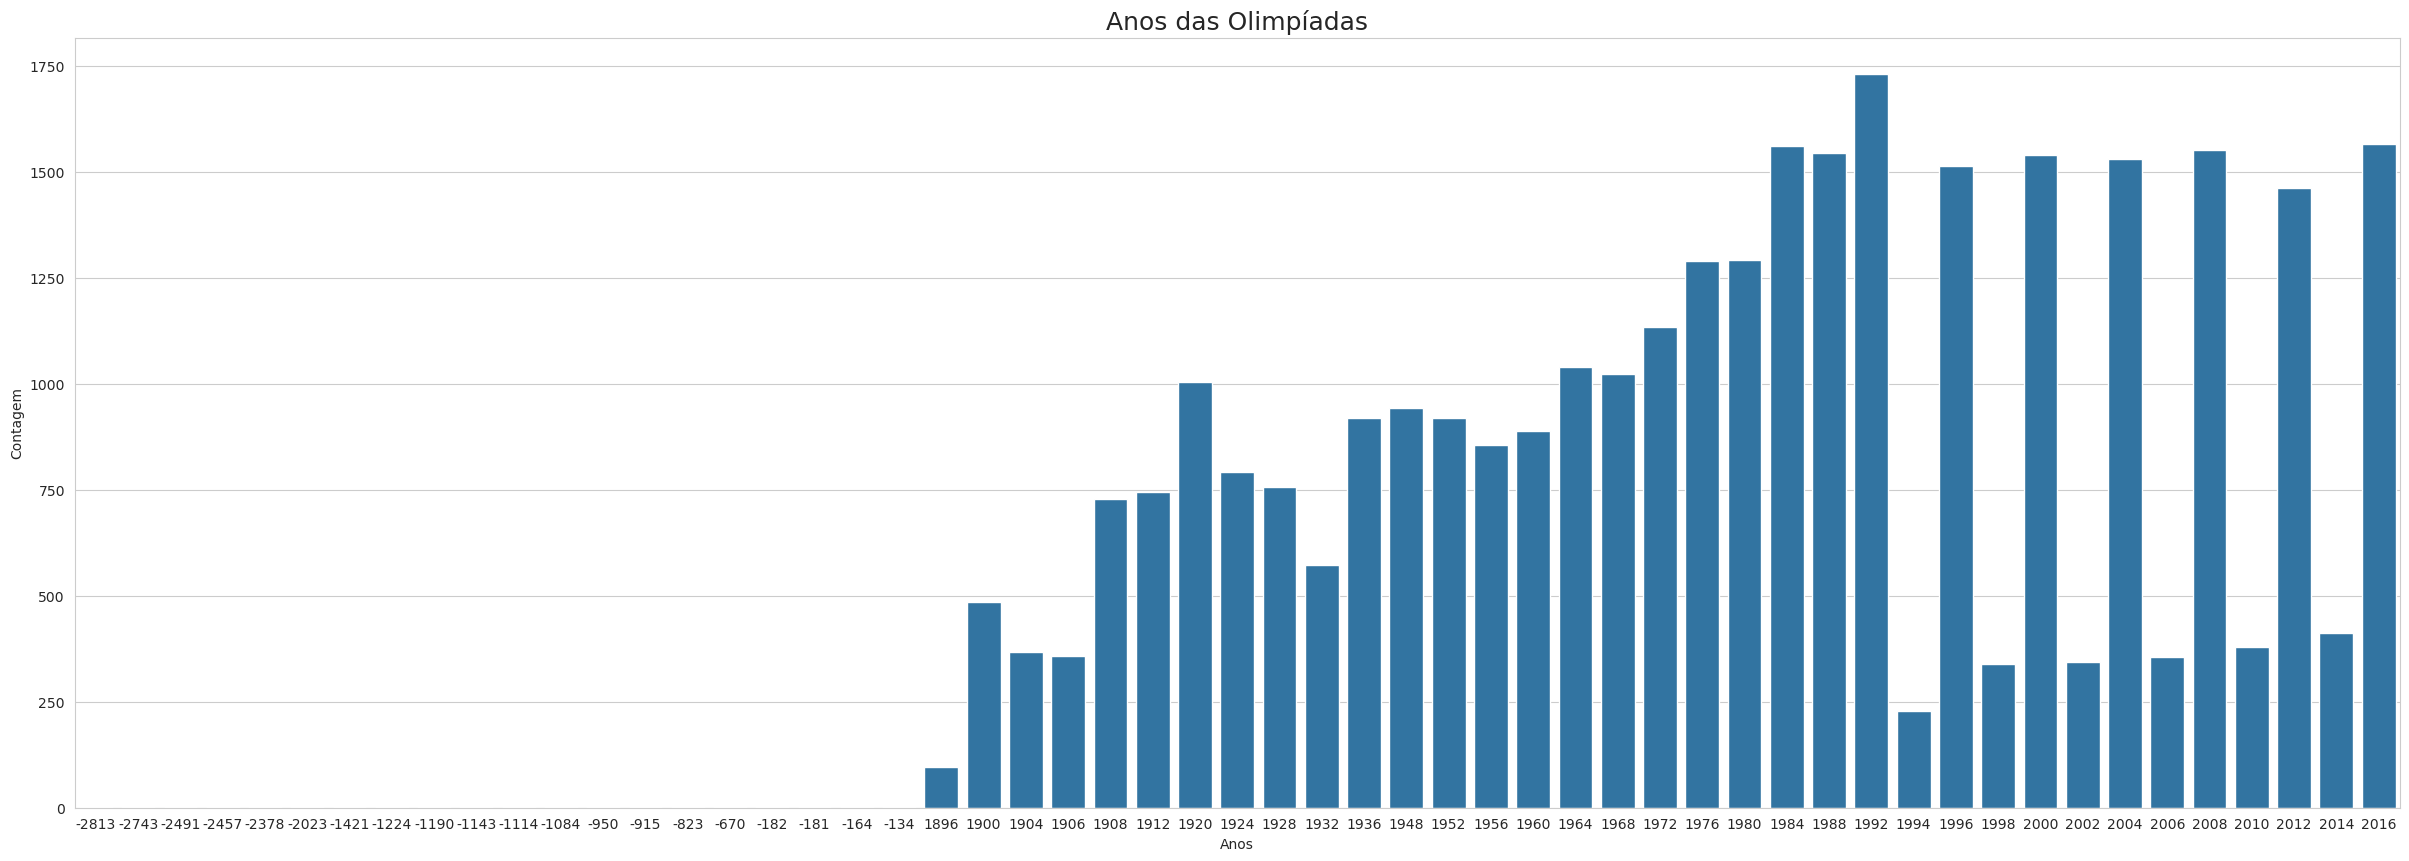

In [715]:
plt.figure(figsize=(30,10))
sns.countplot(x='Year', data=jogos)
plt.xlabel("Anos")
plt.ylabel("Contagem")
plt.title("Anos das Olimpíadas", fontsize=18)
plt.show()

Não deveriam haver anos inferiores a 1896, pois este foi o ano em que surgiram os jogos olímpicos

Removendo esses dados

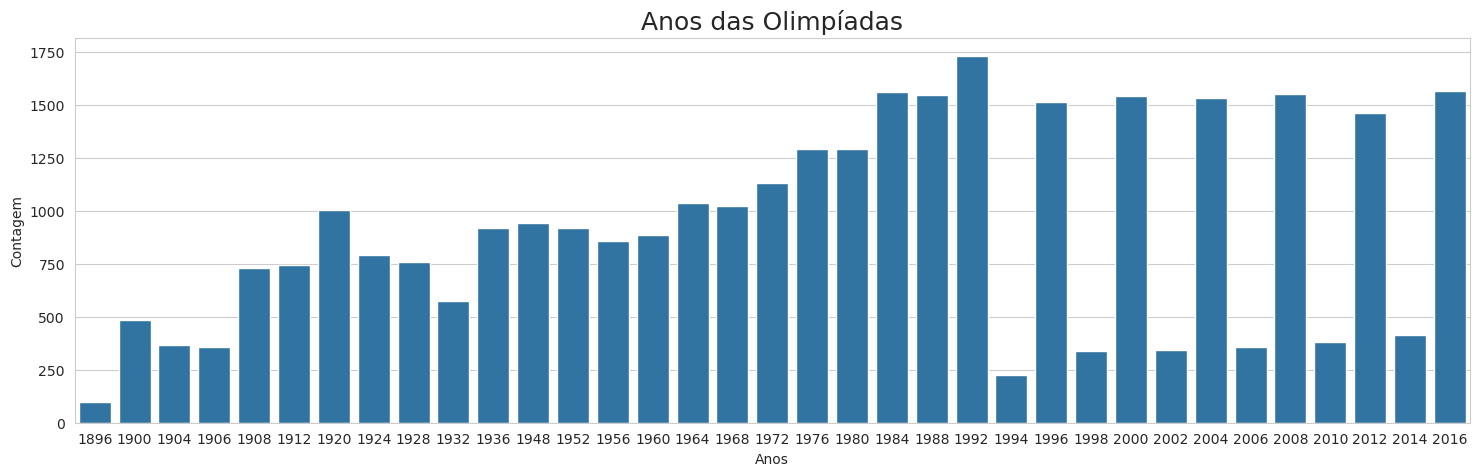

In [716]:
jogos = jogos[jogos['Year'] >= 1896]

plt.figure(figsize=(18,5))
sns.countplot(x = 'Year', data = jogos) 
plt.xlabel("Anos")
plt.ylabel("Contagem")
plt.title("Anos das Olimpíadas", fontsize=18)
plt.show()

A discrepância entre os anos inferiores a 1994 com seus superiores se deve ao fato de que a partir de 1994, os jogos de Verão e Inverno foram colocados em alternância aos anos pares, o que não acontecia antes.





### Coluna "Height":

Verificando outliers por um boxplot.

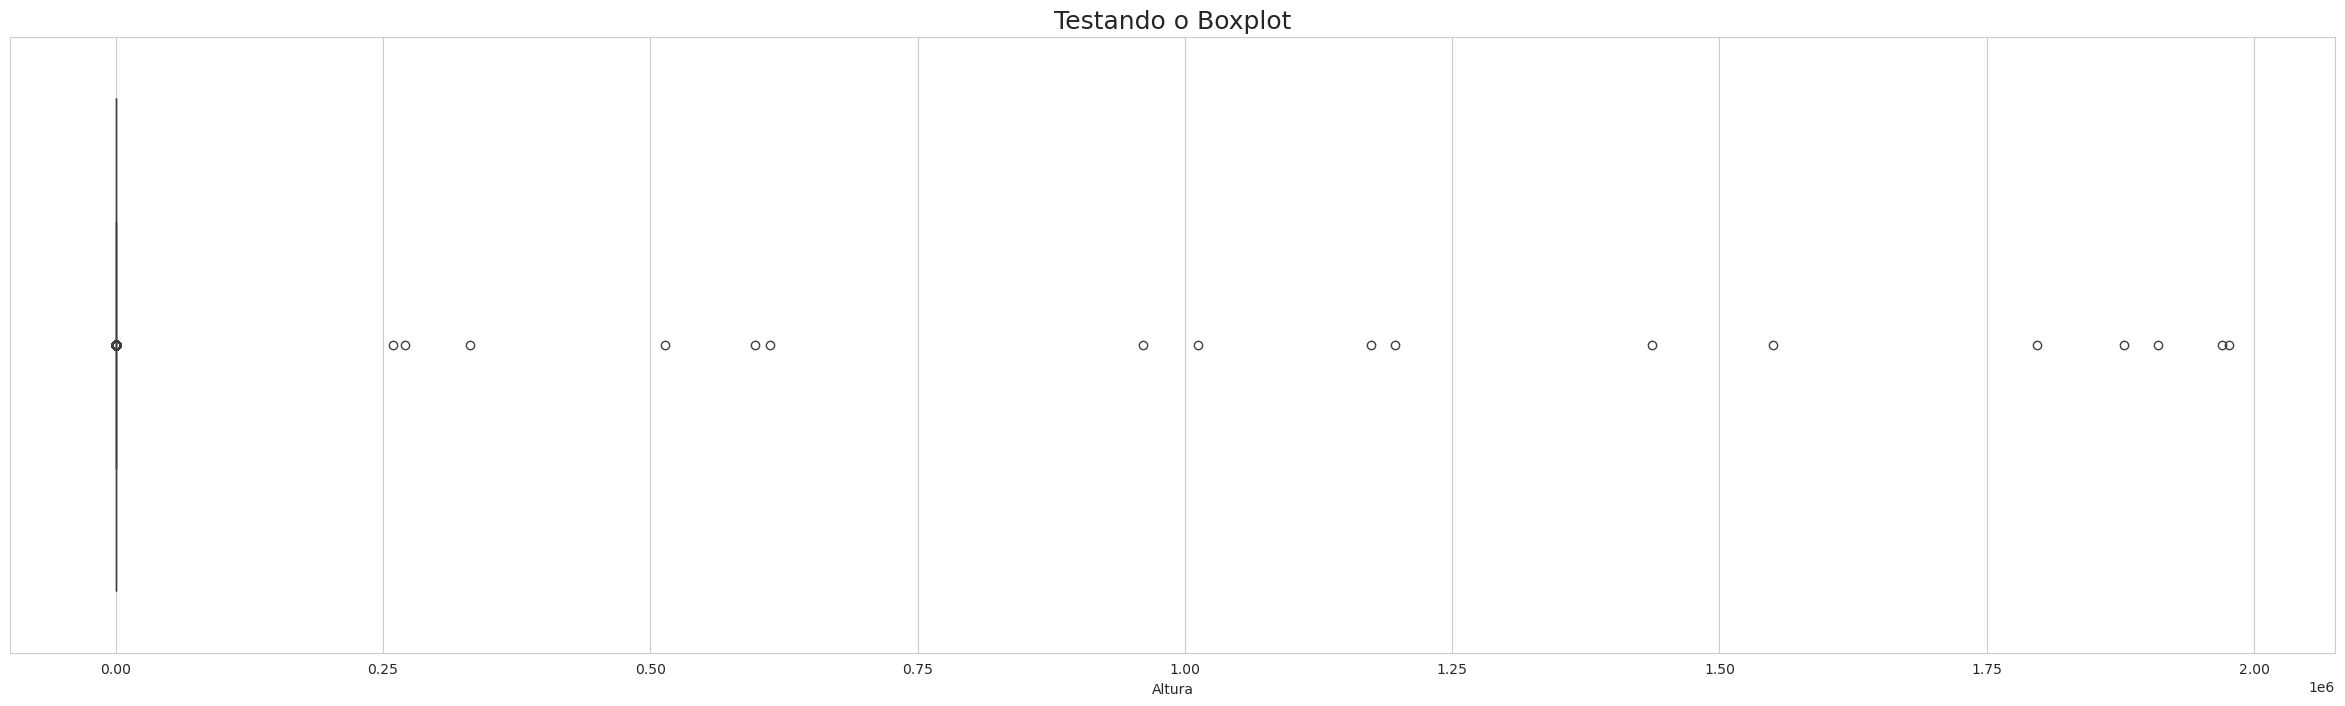

In [717]:
plt.figure(figsize=(30,8))
sns.boxplot(data=jogos, x="Height")
plt.title("Testando o Boxplot", fontsize=18)
plt.xlabel("Altura")
plt.show()

In [718]:
duplicates = jogos.index.duplicated()
print(jogos[duplicates])

Empty DataFrame
Columns: [Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal]
Index: []


Obs: gráfico ilegível pois há valores extremamente discrepantes

Analisando primeiro alturas acima de 210cm:

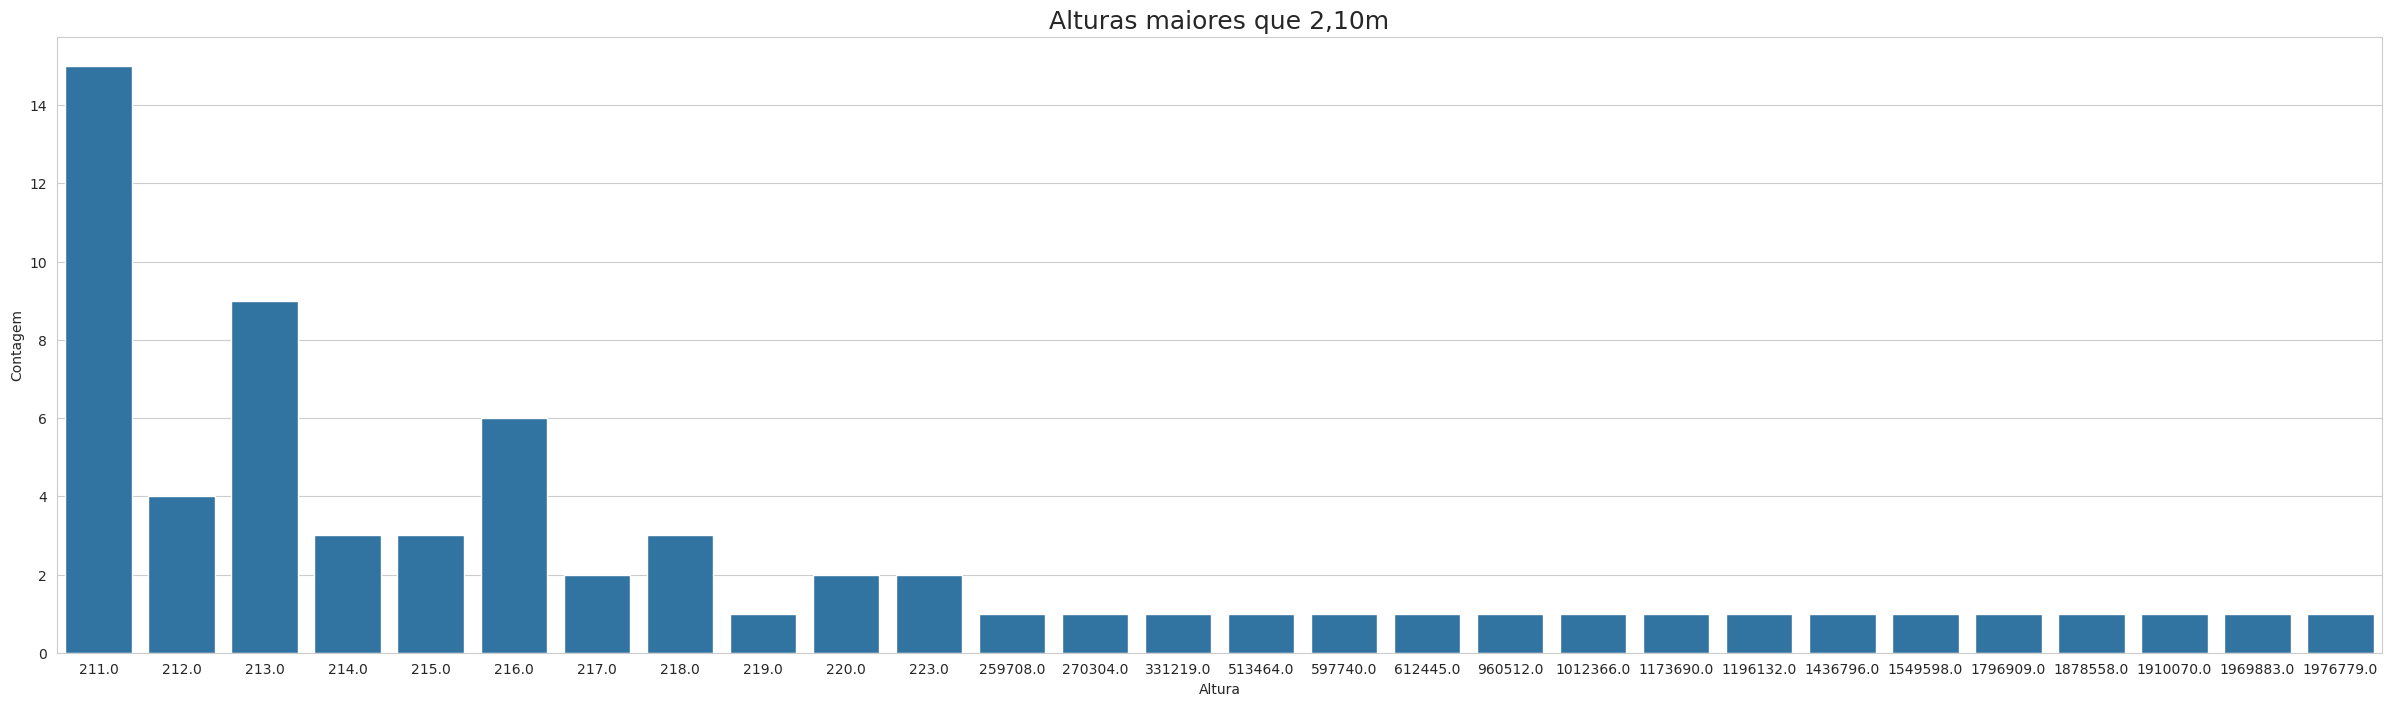

In [719]:
plt.figure(figsize=(30,8))
sns.countplot(x = "Height", data = jogos[jogos["Height"] > 210])
plt.xlabel("Altura")
plt.ylabel("Contagem")
plt.title("Alturas maiores que 2,10m", fontsize=18)
plt.show()

Valores como 233157 cm ou superiores não são possíveis e devem ser retirados

Analisando alturas menores que 160cm:

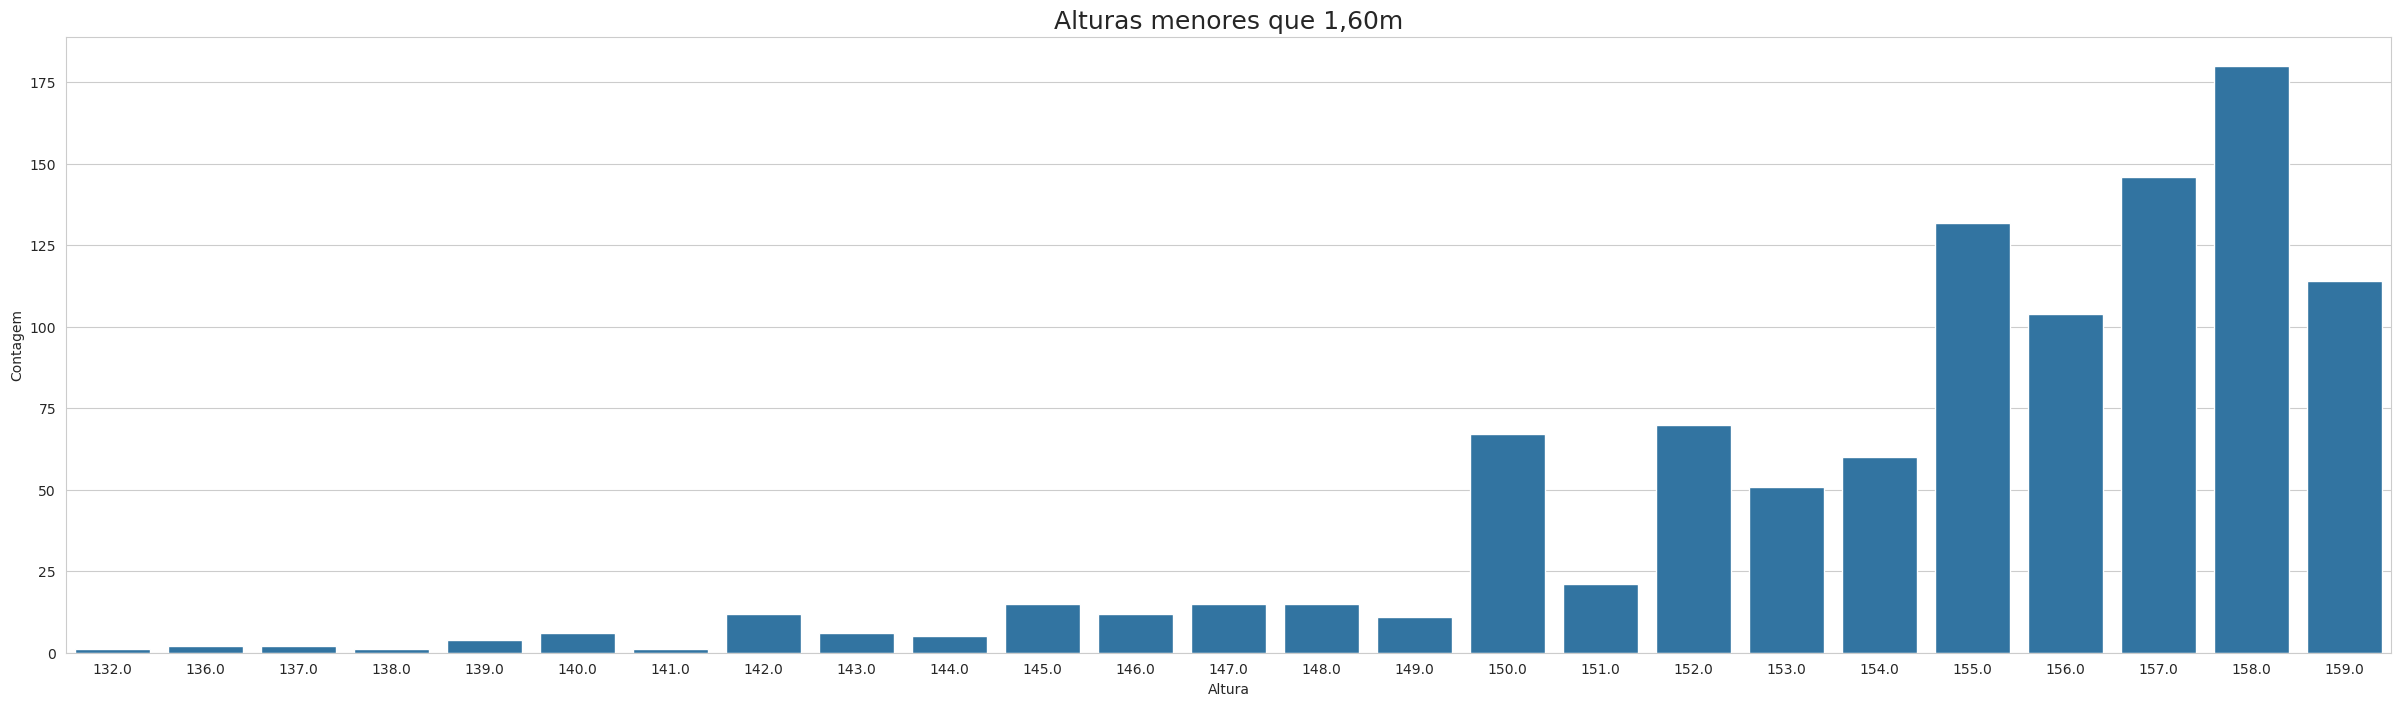

In [720]:
plt.figure(figsize=(30,8))
sns.countplot(x = "Height", data = jogos[jogos["Height"] < 160])
plt.xlabel("Altura")
plt.ylabel("Contagem")
plt.title("Alturas menores que 1,60m", fontsize=18)
plt.show()

Observando novamente o gráfico

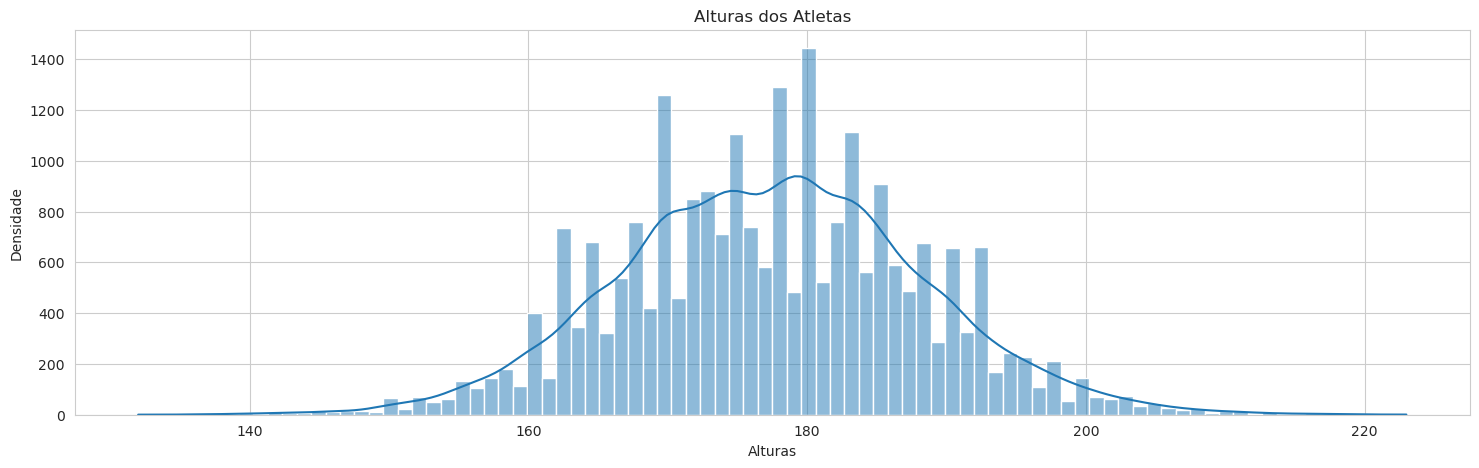

In [721]:
jogos = jogos[jogos['Height'] <= 223]

plt.figure(figsize=(18,5))
sns.histplot(x=jogos['Height'],kde=True)
plt.xlabel("Alturas")
plt.ylabel("Densidade")
plt.title('Alturas dos Atletas')
plt.show()

# Análise de Dados


## Mulheres x Homens

Text(0.5, 1.0, 'Sexos nas Olimpíadas')

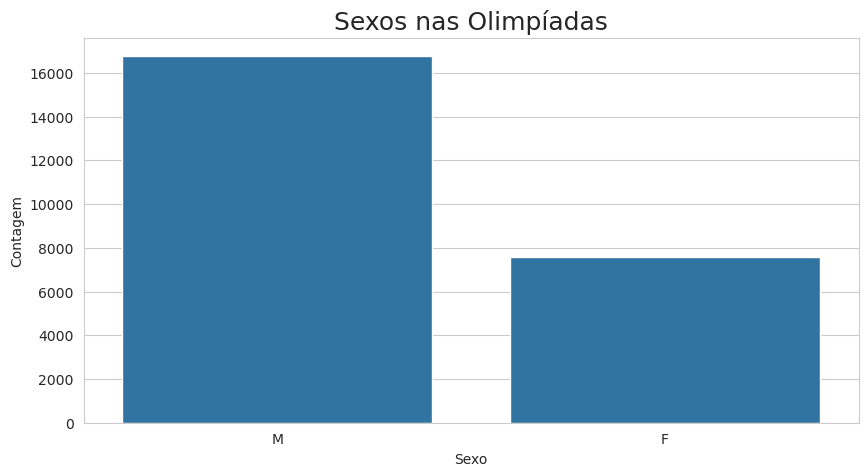

In [722]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Sex', data = jogos) 
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.title("Sexos nas Olimpíadas", fontsize=18)

Nota-se maior participação masculina.

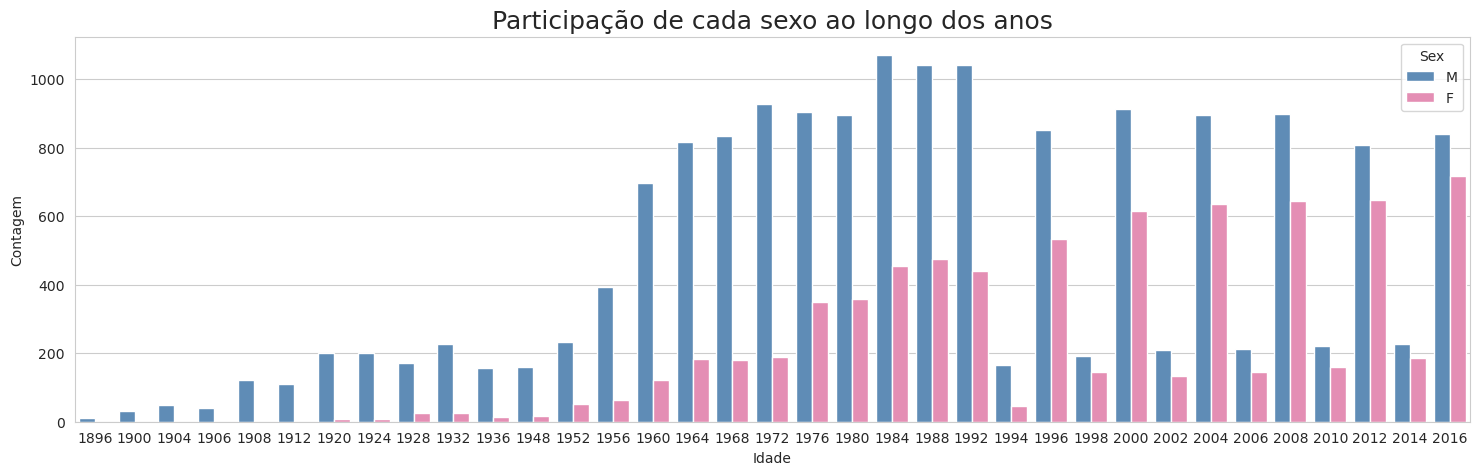

In [723]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'Year', hue="Sex", data = jogos, palette={"M": "#518cc4", "F": "#f280b2"}) 
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Participação de cada sexo ao longo dos anos", fontsize=18)
plt.show()

Nota-se que a diferença entre os dois sexos vem se reduzindo

## Top 5 jogos femininos e masculinos:

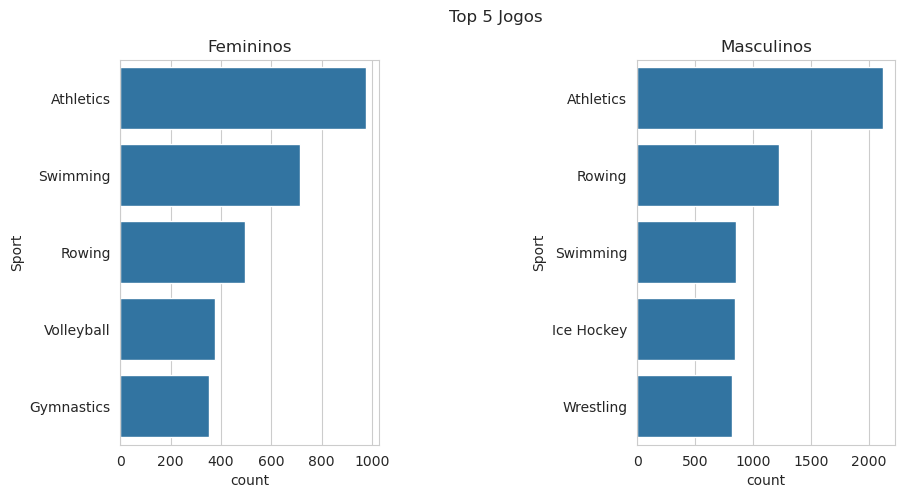

In [724]:
mulheres = jogos[jogos["Sex"] == "F"]
homens = jogos[jogos["Sex"] == "M"]

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Top 5 Jogos')
plt.subplots_adjust(wspace=1)

ax[0].set_title('Femininos')
sns.countplot(ax = ax[0], y = "Sport", data = mulheres,
              order=mulheres["Sport"].value_counts().index[:5])

ax[1].set_title('Masculinos')
sns.countplot(ax = ax[1], y = "Sport", data = homens,
              order=homens["Sport"].value_counts().index[:5])


plt.show()

Visão mais geral:

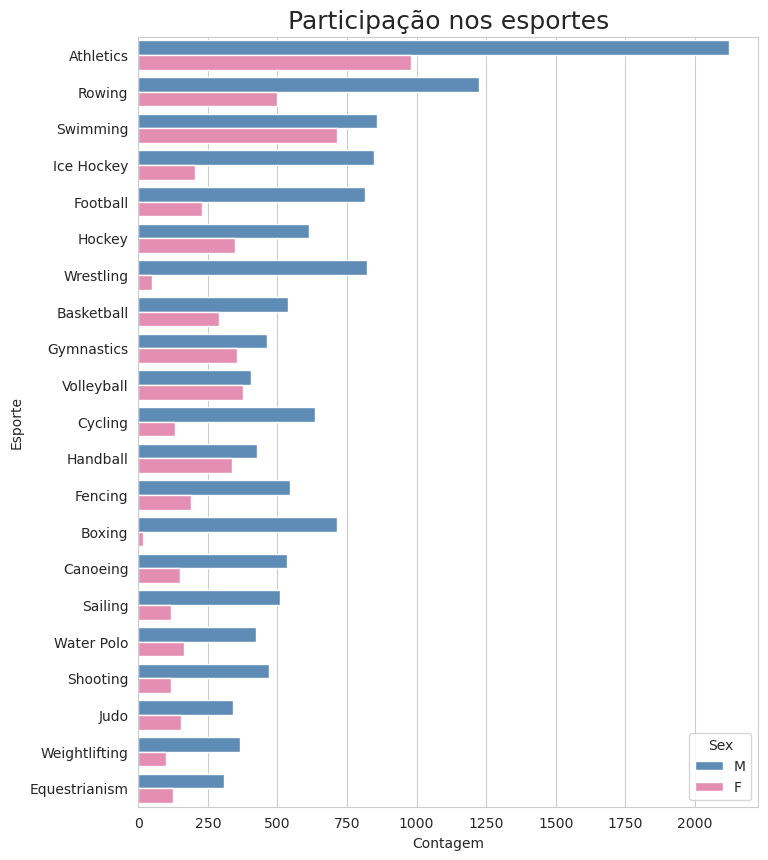

In [725]:
plt.figure(figsize = (8,10))
sns.countplot(y = "Sport", hue = "Sex", data = jogos, palette={"M": "#518cc4", "F": "#f280b2"},order=jogos["Sport"].value_counts().index)
plt.ylim(20.5)
plt.xlabel("Contagem")
plt.ylabel("Esporte")
plt.title("Participação nos esportes", fontsize=18)
plt.show()

### Distribuição de idades nos top 5 jogos:

In [726]:
top5_mulheres = mulheres["Sport"].value_counts(sort=True).index[:5]
top5_mulheres = mulheres[mulheres["Sport"].isin(top5_mulheres)]

top5_homens = homens["Sport"].value_counts(sort=True).index[:5]
top5_homens = homens[homens["Sport"].isin(top5_homens)]

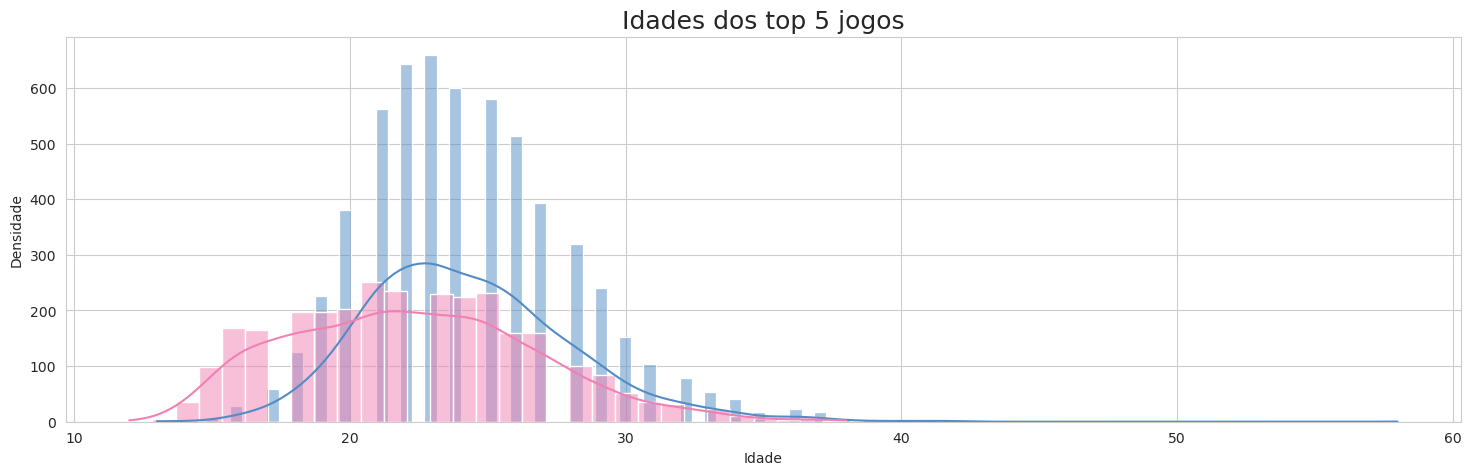

In [727]:

plt.figure(figsize=(18,5))
sns.histplot(top5_homens["Age"], color = "#518cc4", kde=True) 
sns.histplot(top5_mulheres["Age"], color = "#f280b2", kde=True)
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.title("Idades dos top 5 jogos", fontsize=18) 
plt.show()

## Medalhas por país

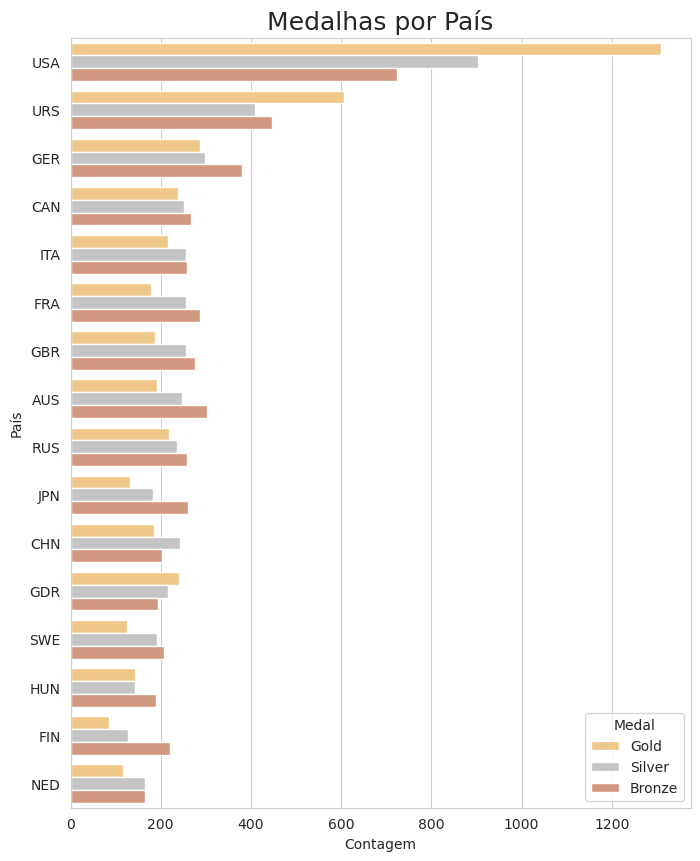

In [728]:
plt.figure(figsize = (8,10))
sns.countplot(y = "NOC", hue = "Medal", data = jogos, hue_order = ["Gold", "Silver", "Bronze"], 
              palette = {"Gold": "#ffcb78", "Silver": "#c4c4c4", "Bronze": "#de9273"}, 
              order=jogos["NOC"].value_counts().index)
plt.ylim(15.5)
plt.xlabel("Contagem")
plt.ylabel("País")
plt.title("Medalhas por País", fontsize=18)
plt.show()

### Jogos de Verão vs Inverno

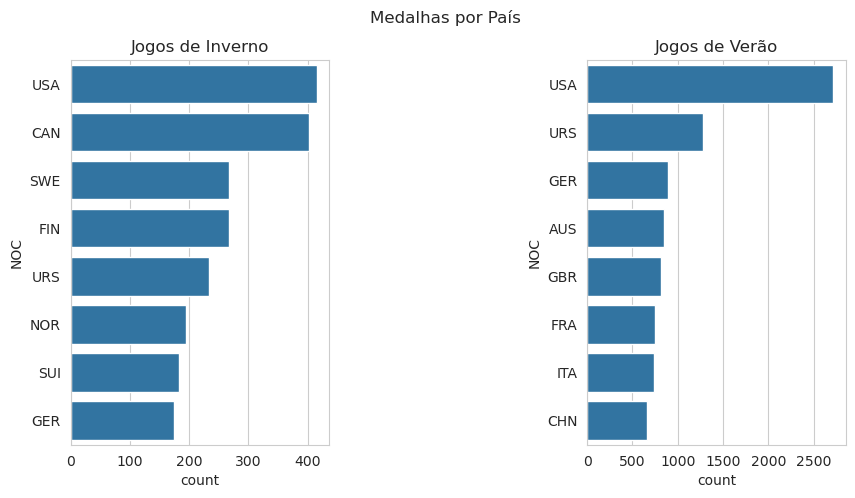

In [729]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Medalhas por País')
plt.subplots_adjust(wspace=1)

ax[0].set_title('Jogos de Inverno')
sns.countplot(ax = ax[0], y = "NOC", data = jogos[jogos["Season"] == "Winter"], 
              order=jogos[jogos["Season"] == "Winter"]["NOC"].value_counts().index[:8])

ax[1].set_title('Jogos de Verão')
sns.countplot(ax = ax[1], y = "NOC", data = jogos[jogos["Season"] == "Summer"],
              order=jogos[jogos["Season"] == "Summer"]["NOC"].value_counts().index[:8])


plt.show()


## Competidores com mais medalhas

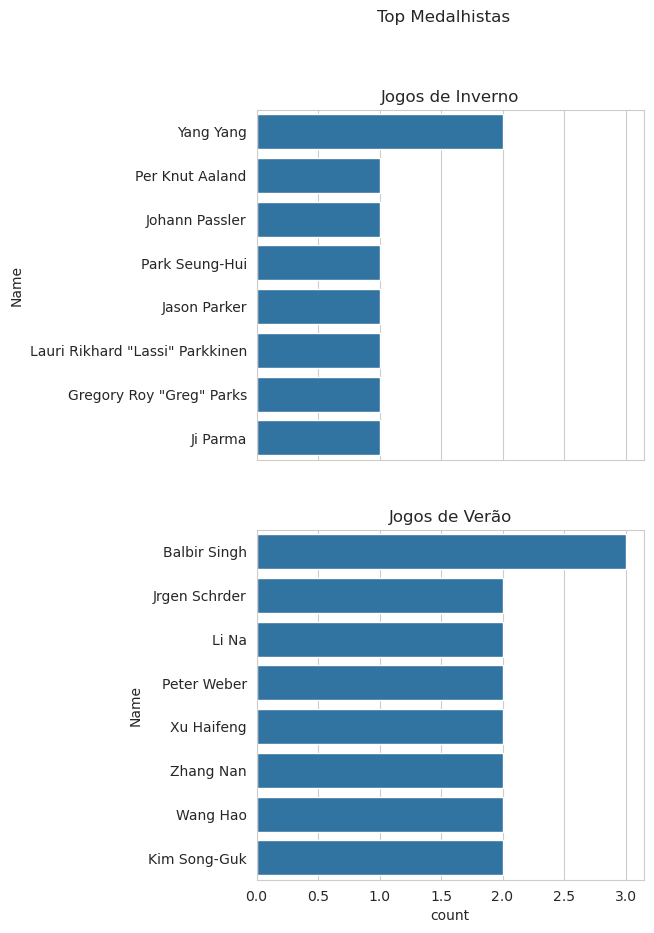

In [730]:
fig, ax = plt.subplots(2, sharex=True, figsize=(5,10))
fig.suptitle('Top Medalhistas')
sns.set_style("whitegrid")

ax[0].set_title('Jogos de Inverno')
sns.countplot(ax = ax[0], y = "Name", data = jogos[jogos["Season"] == "Winter"], 
              order=jogos[jogos["Season"] == "Winter"]["Name"].value_counts().index[:8])

ax[1].set_title('Jogos de Verão')
sns.countplot(ax = ax[1], y = "Name", data = jogos[jogos["Season"] == "Summer"],
              order=jogos[jogos["Season"] == "Summer"]["Name"].value_counts().index[:8])


plt.show()